In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')



In [6]:
file_path = "/Users/badrirohith/Desktop/ImpactSense-Earthquake/Day01_DataCollection_API/historical_clean.csv"
df = pd.read_csv(file_path)
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
print(df.head())


✅ Dataset Loaded Successfully!
Shape: (492, 6)
                      time                                  place  magnitude  \
0  2023-08-31 21:43:25.888          South Sandwich Islands region        4.5   
1  2023-08-31 19:33:42.976  51 km SSE of Honiara, Solomon Islands        5.1   
2  2023-08-31 19:18:37.570            117 km WSW of Pangai, Tonga        4.8   
3  2023-08-31 18:45:19.038         78 km W of Murghob, Tajikistan        4.8   
4  2023-08-31 16:53:12.225        23 km SSW of Tagāb, Afghanistan        4.6   

   longitude  latitude    depth  
0   -26.6644  -55.9173   35.000  
1   160.2109   -9.8238   22.741  
2  -175.4463  -20.0729  149.933  
3    73.0729   38.0851   50.206  
4    69.5179   34.6691   14.895  


In [7]:
df_model = df[['magnitude', 'depth']].copy()

# Create 3 impact levels based on magnitude
df_model['Impact_Level'] = pd.cut(
    df_model['magnitude'],
    bins=[0, 4.5, 6.0, 10],
    labels=['Low', 'Medium', 'High']
)

# Encode target variable
label_encoder = LabelEncoder()
df_model['Impact_Encoded'] = label_encoder.fit_transform(df_model['Impact_Level'])

print("✅ Target variable encoded successfully!")
print(df_model['Impact_Level'].value_counts())
print(df_model.head())


✅ Target variable encoded successfully!
Impact_Level
Medium    350
Low       135
High        7
Name: count, dtype: int64
   magnitude    depth Impact_Level  Impact_Encoded
0        4.5   35.000          Low               1
1        5.1   22.741       Medium               2
2        4.8  149.933       Medium               2
3        4.8   50.206       Medium               2
4        4.6   14.895       Medium               2


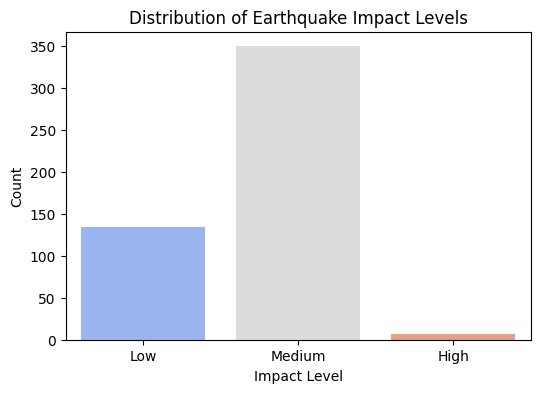

In [8]:
plt.figure(figsize=(6,4))
sns.countplot(x='Impact_Level', data=df_model, palette='coolwarm')
plt.title("Distribution of Earthquake Impact Levels")
plt.xlabel("Impact Level")
plt.ylabel("Count")
plt.show()


In [9]:
X = df_model[['magnitude', 'depth']]
y = df_model['Impact_Encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✅ Data Split Successful!")
print("Train:", X_train.shape[0], " Test:", X_test.shape[0])


✅ Data Split Successful!
Train: 393  Test: 99


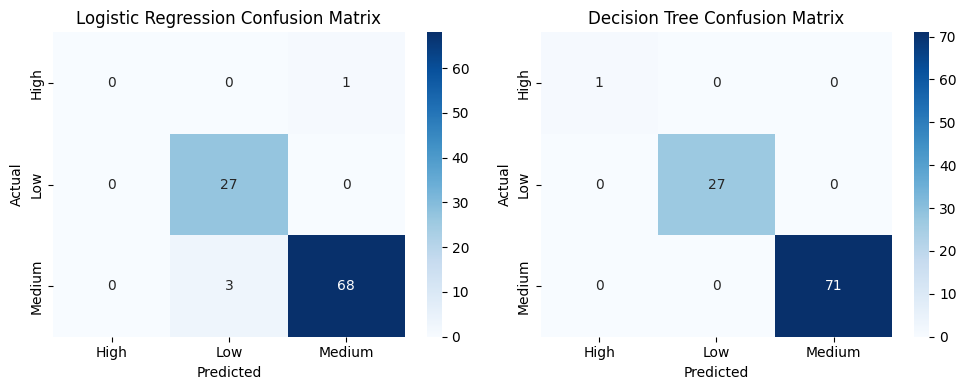

✅ Logistic Regression Accuracy: 0.960
✅ Decision Tree Accuracy: 1.000


In [10]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

plt.figure(figsize=(10,4))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    # Confusion Matrix Plot
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1,2,i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

for name, acc in results.items():
    print(f"✅ {name} Accuracy: {acc:.3f}")


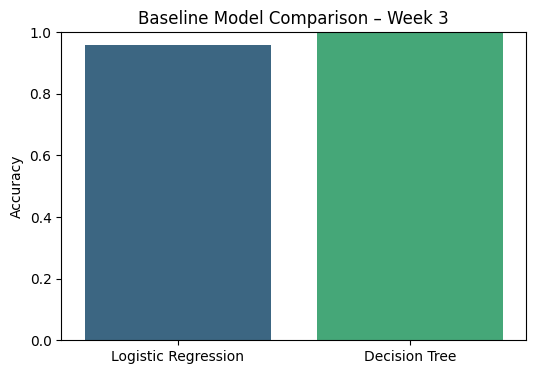

In [11]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='viridis')
plt.title("Baseline Model Comparison – Week 3")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')


In [2]:
file_path = "/Users/badrirohith/Desktop/ImpactSense-Earthquake/Day01_DataCollection_API/historical_clean.csv"
df = pd.read_csv(file_path)

df_model = df[['magnitude', 'depth']].copy()
df_model['Impact_Level'] = pd.cut(df_model['magnitude'], bins=[0,4.5,6.0,10], labels=['Low','Medium','High'])
label_encoder = LabelEncoder()
df_model['Impact_Encoded'] = label_encoder.fit_transform(df_model['Impact_Level'])

X = df_model[['magnitude', 'depth']]
y = df_model['Impact_Encoded']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("✅ Data ready for advanced models.")


✅ Data ready for advanced models.


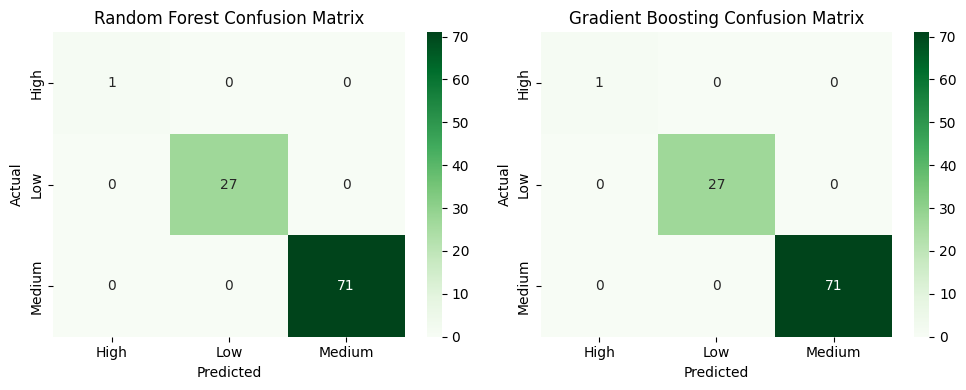

✅ Random Forest Accuracy: 1.000
✅ Gradient Boosting Accuracy: 1.000


In [3]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

results = {}

plt.figure(figsize=(10,4))
for i, (name, model) in enumerate(models.items(), 1):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.subplot(1,2,i)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
                xticklabels=label_encoder.classes_,
                yticklabels=label_encoder.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")

plt.tight_layout()
plt.show()

for name, acc in results.items():
    print(f"✅ {name} Accuracy: {acc:.3f}")

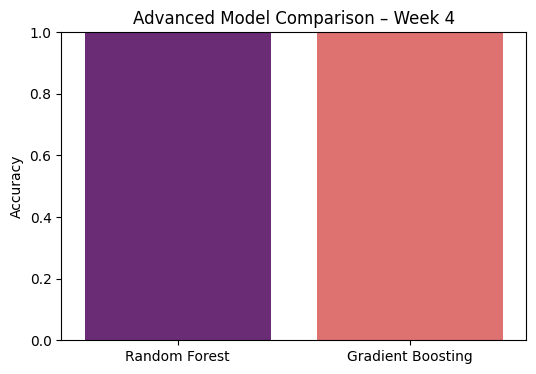

In [4]:
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette='magma')
plt.title("Advanced Model Comparison – Week 4")
plt.ylabel("Accuracy")
plt.ylim(0,1)
plt.show()


In [5]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_rf = grid_search.best_estimator_
print("✅ Best Parameters Found:", grid_search.best_params_)


✅ Best Parameters Found: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


📋 Classification Report (Tuned Random Forest):
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         1
         Low       1.00      1.00      1.00        27
      Medium       1.00      1.00      1.00        71

    accuracy                           1.00        99
   macro avg       1.00      1.00      1.00        99
weighted avg       1.00      1.00      1.00        99



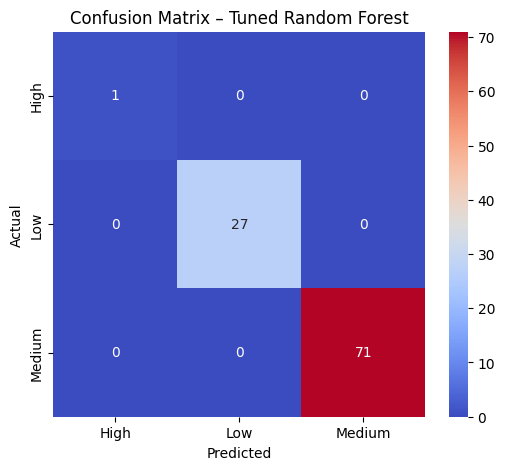

In [6]:
y_pred_rf = best_rf.predict(X_test)
print("📋 Classification Report (Tuned Random Forest):")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.title("Confusion Matrix – Tuned Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


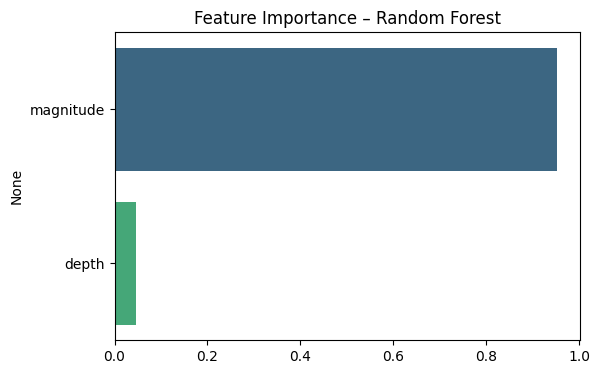

In [7]:
importances = best_rf.feature_importances_
features = X.columns

plt.figure(figsize=(6,4))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title("Feature Importance – Random Forest")
plt.show()
